In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [2]:
import pandas as pd
train_df = pd.read_csv(r"C:\Users\Arnav\Desktop\sign_mnist_train.csv")
test_df = pd.read_csv(r"C:\Users\Arnav\Desktop\sign_mnist_test.csv")

In [3]:
test = pd.read_csv(r"C:\Users\Arnav\Desktop\sign_mnist_test.csv")
y = test['label']

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [6]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [7]:
x_train = train_df.values
x_test = test_df.values

In [8]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [9]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

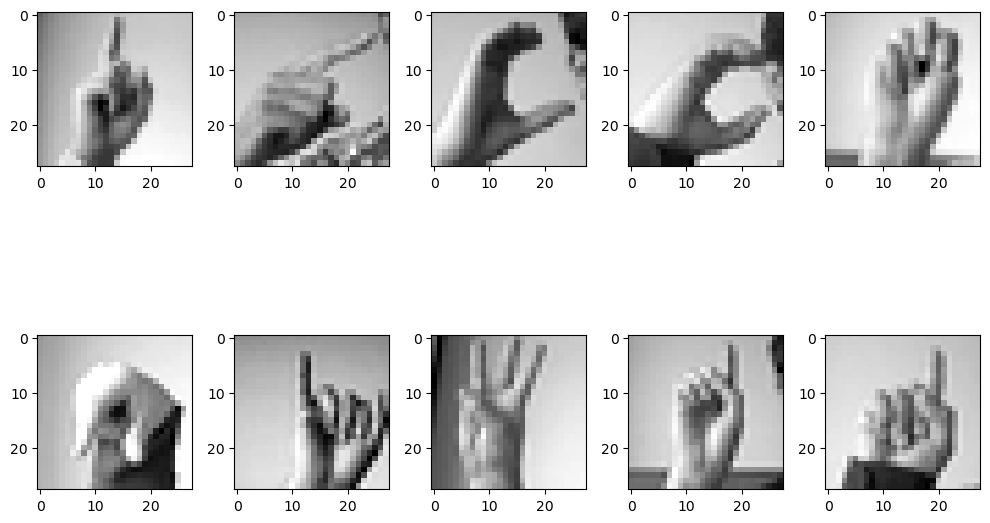

In [10]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()    

In [11]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [13]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

C:\Users\Arnav\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 75)          │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 50)          │          33,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 25)            │          11,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 25)            │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         205,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,049 (1.01 MB)

 Trainable params: 263,749 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

In [14]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20


C:\Users\Arnav\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 55s 239ms/step - accuracy: 0.4693 - loss: 1.7916 - val_accuracy: 0.1322 - val_loss: 3.1013 - learning_rate: 0.0010
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 49s 226ms/step - accuracy: 0.9149 - loss: 0.2501 - val_accuracy: 0.5220 - val_loss: 1.4686 - learning_rate: 0.0010
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 47s 219ms/step - accuracy: 0.9639 - loss: 0.1125 - val_accuracy: 0.9173 - val_loss: 0.2408 - learning_rate: 0.0010
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 49s 226ms/step - accuracy: 0.9750 - loss: 0.0820 - val_accuracy: 0.9801 - val_loss: 0.0549 - learning_rate: 0.0010
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 48s 221ms/step - accuracy: 0.9841 - loss: 0.0494 - val_accuracy: 0.9650 - val_loss: 0.1007 - learning_rate: 0.0010
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 48s 221ms/step - accuracy: 0.9897 - loss: 0.0339 - val_accuracy: 0.9887 - val_loss: 0.0403 - learning_rate: 0.0010
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 51s 239ms/step - accuracy: 0.9904 - loss:

In [15]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 2.1400e-04
Accuracy of the model is -  100.0 %


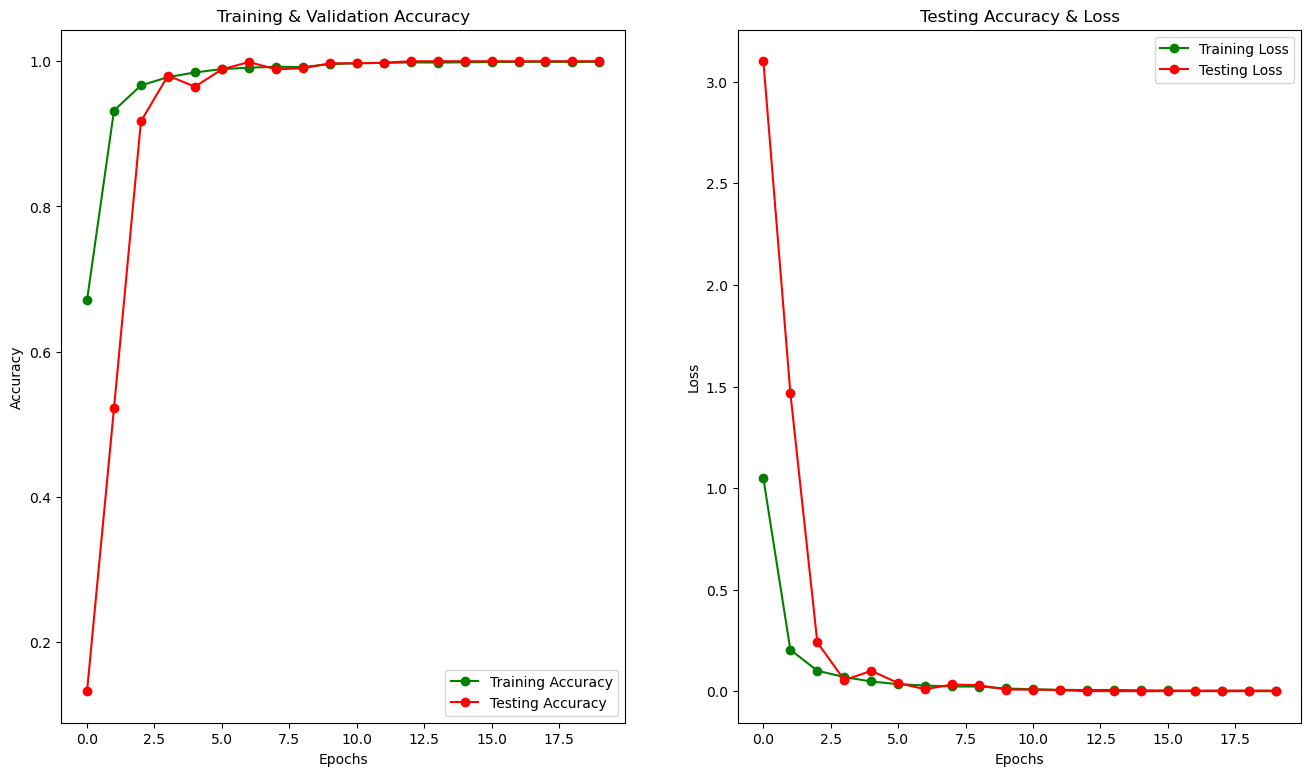

In [16]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [18]:
import numpy as np

# Predict probabilities for each class
predictions = model.predict(x_test)

# Convert probabilities to class labels
predictions = np.argmax(predictions, axis=1)

# Example condition loop
for i in range(len(predictions)):
    if predictions[i] >= 9:
        print(f"Sample {i} is in class {predictions[i]}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Sample 2 is in class 9
Sample 5 is in class 20
Sample 6 is in class 9
Sample 7 is in class 13
Sample 12 is in class 20
Sample 13 is in class 11
Sample 16 is in class 21
Sample 22 is in class 20
Sample 24 is in class 9
Sample 25 is in class 14
Sample 27 is in class 14
Sample 32 is in class 12
Sample 33 is in class 18
Sample 35 is in class 20
Sample 36 is in class 12
Sample 38 is in class 17
Sample 39 is in class 13
Sample 40 is in class 14
Sample 41 is in class 22
Sample 43 is in class 14
Sample 44 is in class 13
Sample 46 is in class 16
Sample 48 is in class 18
Sample 49 is in class 12
Sample 50 is in class 19
Sample 51 is in class 21
Sample 52 is in class 19
Sample 54 is in class 15
Sample 55 is in class 15
Sample 56 is in class 20
Sample 59 is in class 21
Sample 60 is in class 9
Sample 61 is in class 12
Sample 62 is in class 10
Sample 63 is in class 21
Sample 65 is in class 9
Sample 68 is in class 17
Sample 70 is in class 19
Sample 72 is in cl

In [22]:
classes = ["Class " + str(i) for i in range(25)]
print(classification_report(y, predictions, target_names=classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      1.00      1.00       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
     Class 9       0.00      0.00      0.00         0
    Class 10       0.00      0.00      0.00       331
    Class 11       0.00      0.00      0.00       209
    Class 12       0.00      0.00      0.00       394
    Class 13       0.00      0.00      0.00       291
    Class 14       0.00      0.00      0.00       246
    Class 15       0.00      0.00      0.00       347
    Class 16       0.00      0.00      0.00       164
    Class 17       0.00    

C:\Users\Arnav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Arnav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Arnav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Arnav\anaconda3\Lib\site-packages\sklea

In [23]:
cm = confusion_matrix(y,predictions)

In [42]:
import pandas as pd

# Remove row 9 and column 9 from the confusion matrix
cm = np.delete(cm, 9, axis=0)  # Remove row 9
cm = np.delete(cm, 9, axis=1)  # Remove column 9

# Create DataFrame with adjusted labels
cm_df = pd.DataFrame(cm, 
                     index=[i for i in range(25) if i != 9], 
                     columns=[i for i in range(25) if i != 9])

print(cm_df)

     0    1    2    3    4    5    6    7    8    10  ...   15   16   17   18  \
0   331    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1     0  432    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2     0    0  310    0    0    0    0    0    0    0  ...    0    0    0    0   
3     0    0    0  245    0    0    0    0    0    0  ...    0    0    0    0   
4     0    0    0    0  498    0    0    0    0    0  ...    0    0    0    0   
5     0    0    0    0    0  247    0    0    0    0  ...    0    0    0    0   
6     0    0    0    0    0    0  348    0    0    0  ...    0    0    0    0   
7     0    0    0    0    0    0    0  436    0    0  ...    0    0    0    0   
8     0    0    0    0    0    0    0    0  288    0  ...    0    0    0    0   
10    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
11    0    0    0    0    0    0    0    0    0  209  ...    0    0    0    0   
12    0    0    0    0    0 

<Axes: >

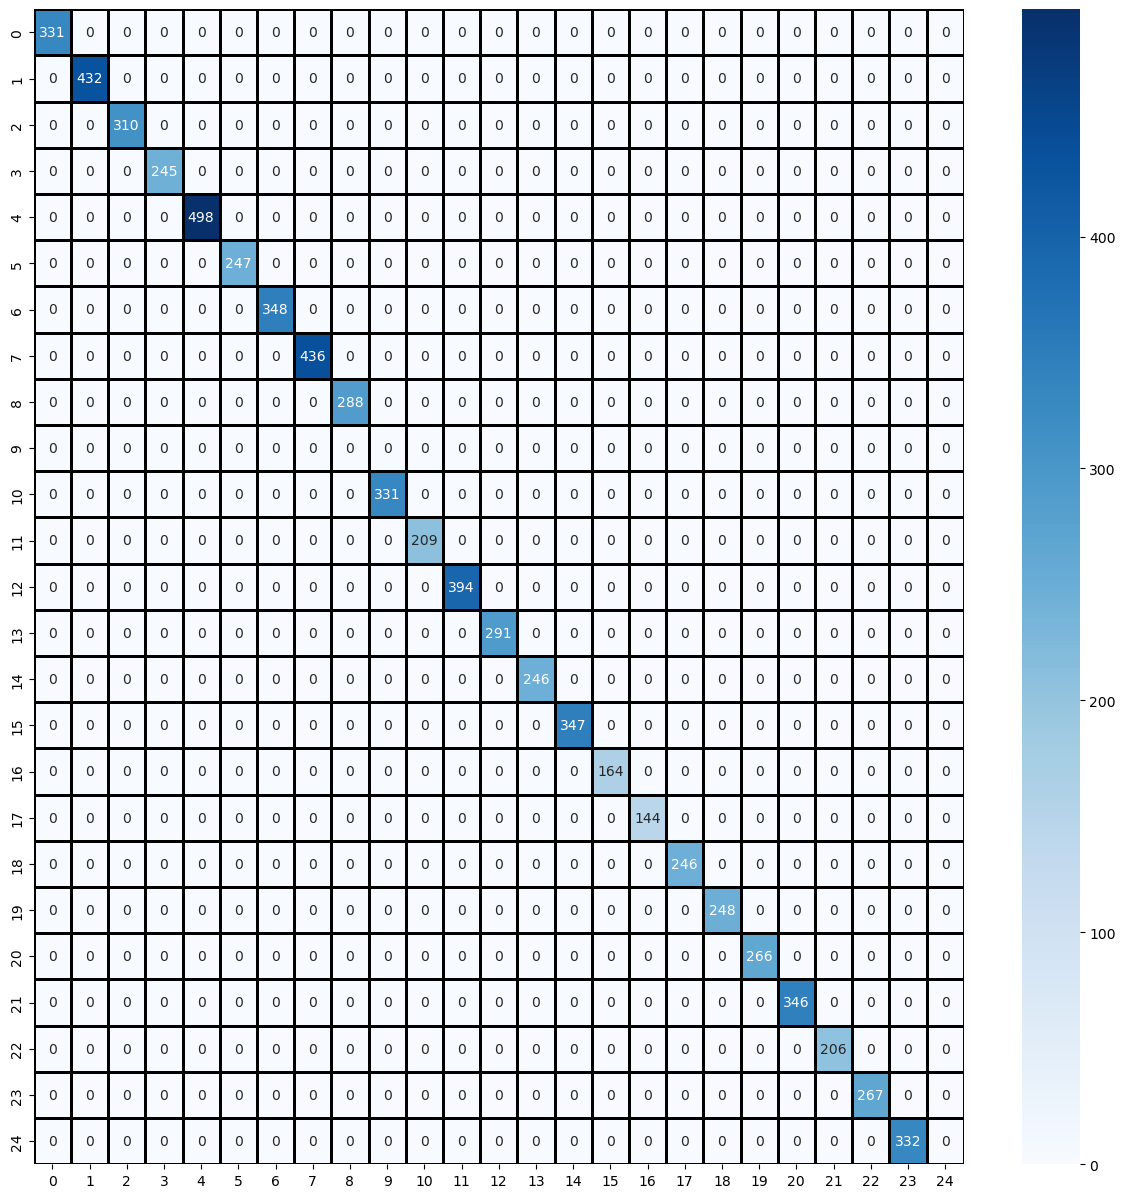

In [25]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [26]:
correct = np.nonzero(predictions == y)[0]

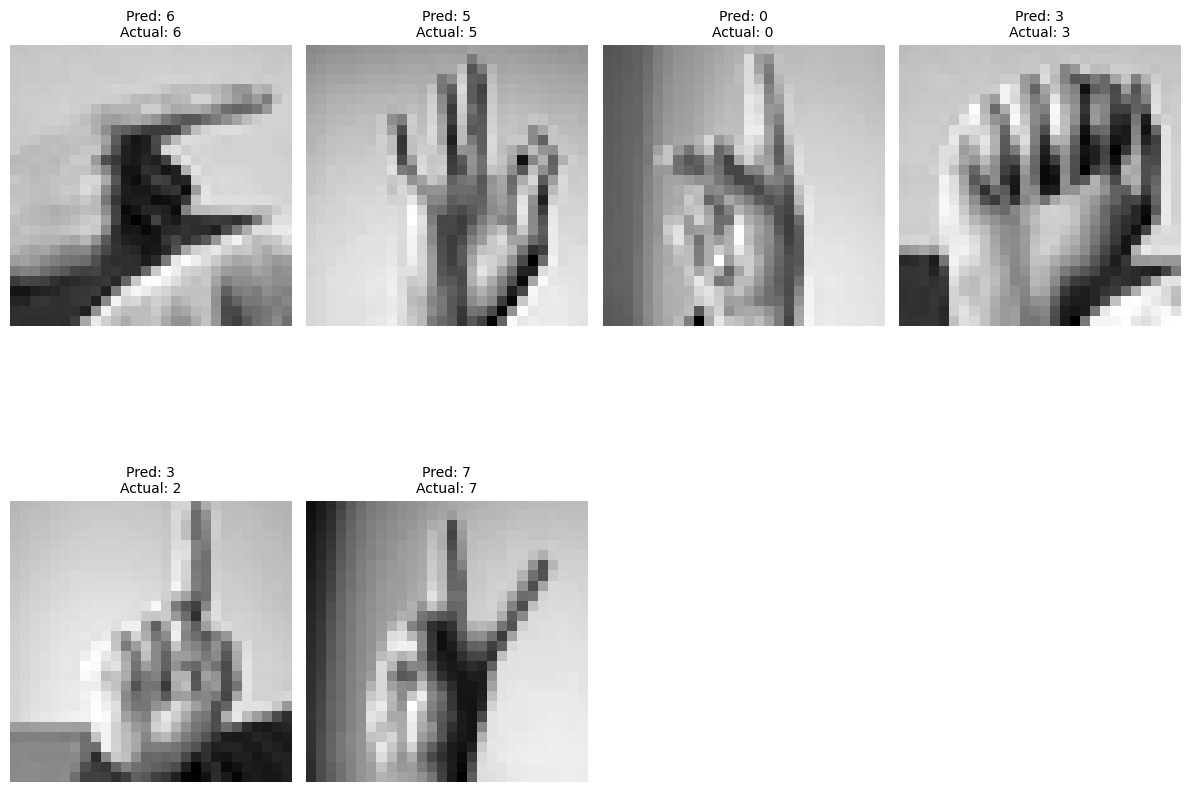

In [48]:
n = min(len(x_test), len(pred_labels), len(true_labels))  # Safely limit the range
images = x_test[:n]

plt.figure(figsize=(12, 10))
for i in range(n):
    plt.subplot((n // 4) + 1, 4, i + 1)  # Auto-adjust grid layout
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {pred_labels[i]}\nActual: {true_labels[i]}", fontsize=10)

plt.tight_layout()
plt.show()